In [1]:
import pandas as pd
import math
import json
import requests
import itertools
import numpy as np
import time
import datetime

In [6]:
df_train=pd.read_csv(r'E:\Reddit\reddit_data_balanced.csv')
df_train.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_train.head()

,title,flair
0,HELP HELP TEST,[R]eddiquette
1,Lets have a conversation Randians,[R]eddiquette
2,Forest guards ordered to watch over python tha...,Non-Political
3,Engineering pass-outs from Shitty colleges (Ti...,AskIndia
4,"The Constitution, as ABVP would have it. [Old]",Politics


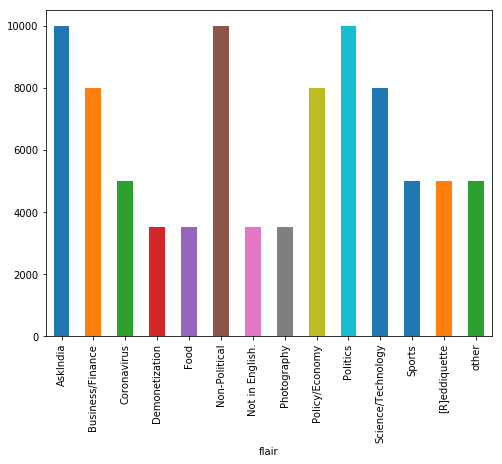

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_train.groupby('flair').title.count().plot.bar(ylim=0)
plt.show()

In [8]:
df_train['category_id'] = df_train['flair'].factorize()[0]
category_id_df = df_train[['flair', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'flair']].values)
df_train.head()

,title,flair,category_id
0,HELP HELP TEST,[R]eddiquette,0
1,Lets have a conversation Randians,[R]eddiquette,0
2,Forest guards ordered to watch over python tha...,Non-Political,1
3,Engineering pass-outs from Shitty colleges (Ti...,AskIndia,2
4,"The Constitution, as ABVP would have it. [Old]",Politics,3


In [9]:
category_to_id

{'AskIndia': 2,
 'Business/Finance': 7,
 'Coronavirus': 13,
 'Demonetization': 6,
 'Food': 5,
 'Non-Political': 1,
 'Not in English.': 10,
 'Photography': 4,
 'Policy/Economy': 12,
 'Politics': 3,
 'Science/Technology': 11,
 'Sports': 9,
 '[R]eddiquette': 0,
 'other': 8}

In [10]:
df_train['flair'].value_counts()

Non-Political         10000
Politics              10000
AskIndia              10000
Policy/Economy         8000
Business/Finance       8000
Science/Technology     8000
Sports                 5000
Coronavirus            5000
[R]eddiquette          5000
other                  5000
Food                   3500
Not in English.        3500
Demonetization         3500
Photography            3500
Name: flair, dtype: int64